In [2]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator
import numpy as np
# from StringIO import StringIO
import datetime as dt
import yaml, glob

In [3]:

def parse_ivals(log: str):
    # print(log)
    # files = glob.glob(log)
    # if len(files) == 0: return None
    with open(log, 'r') as f:
        yaml_src, recording, parsing_finished = "", False, False
        for line in f:
            if line.startswith('===== GC Intervals Start ====='):
                recording = True
            elif line.startswith('===== GC Intervals End ====='):
                recording = False
                parsing_finished = True
            elif recording:
                yaml_src += line
        return yaml.safe_load(yaml_src) if parsing_finished else None

def calculate_work_ivals(stw_ivals, work_ivals):
    ivals = []
    for [x1, x2] in work_ivals:
        overlap = False
        for [y1, y2] in stw_ivals:
            if x1 <= y2 and y1 <= x2:
                overlap = True
                break
        if overlap:
            ivals.append([x1, x2])
    # print(ivals)
    starts = [float(x[0]) / 1000.0 for x in ivals]
    stops = [float(x[1]) / 1000.0 for x in ivals]
    return starts, stops

def plot_timeline(log: str, pauses=None, skip=0):
    data = parse_ivals(log)
    if data is None: return
    if len(data['stw-tracing']) <= 0: return
    plt.figure(figsize=(20,6))
    stw = data['stw-tracing']
    if pauses is None: pauses = len(stw)
    stw = stw[skip : skip+pauses]
    if len(stw) <= 0: return
    data['stw-tracing'] = stw
    n = len(data['busy'])
    # plot work ivals
    # print(data['stw-tracing'])
    for i in range(n):
        starts, stops = calculate_work_ivals(data['stw-tracing'], data['busy'][i])
        y = np.ones(len(starts)) * i
        # timelines(y, starts, stops, 'k')
        plt.hlines(y, starts, stops, 'k', lw=4)
    # plot stw phases
    for [start, stop] in data['stw-tracing']:
        plt.vlines([start/1000.0], [-0.5], [n+0.5], 'r', lw=1)
        plt.vlines([stop/1000.0], [-0.5], [n+0.5], 'b', lw=1)

Immix, 3x heap

/tmp/ipykernel_948358/3403315726.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,6))


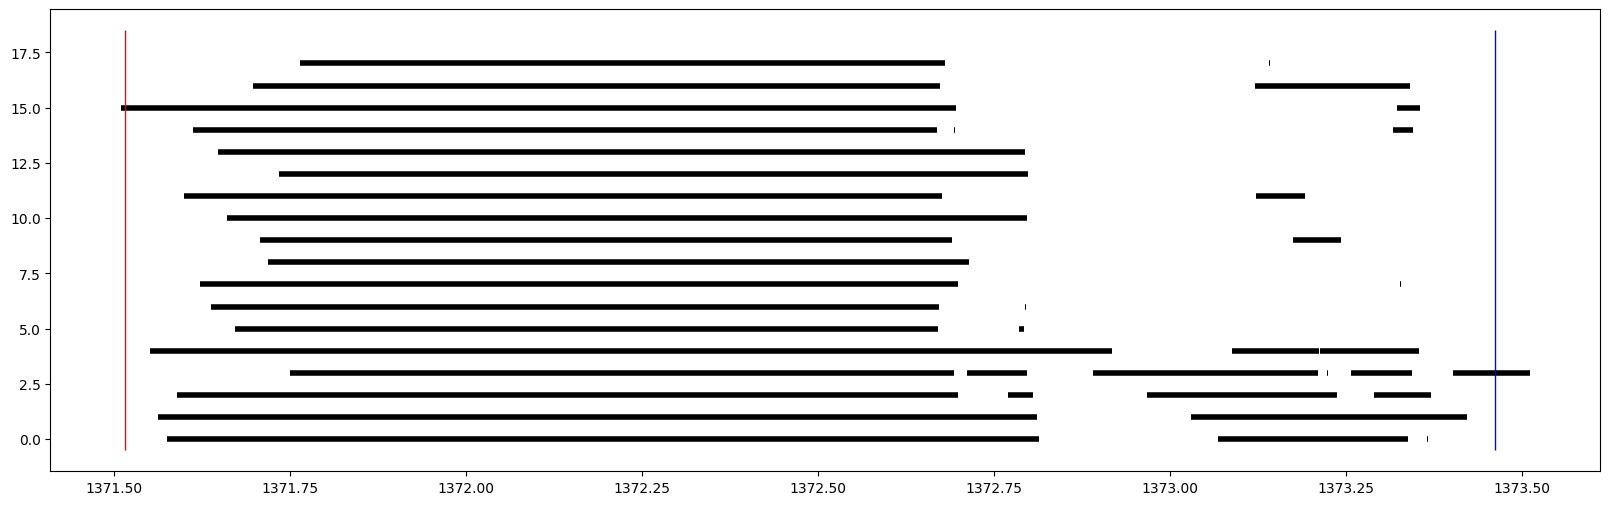

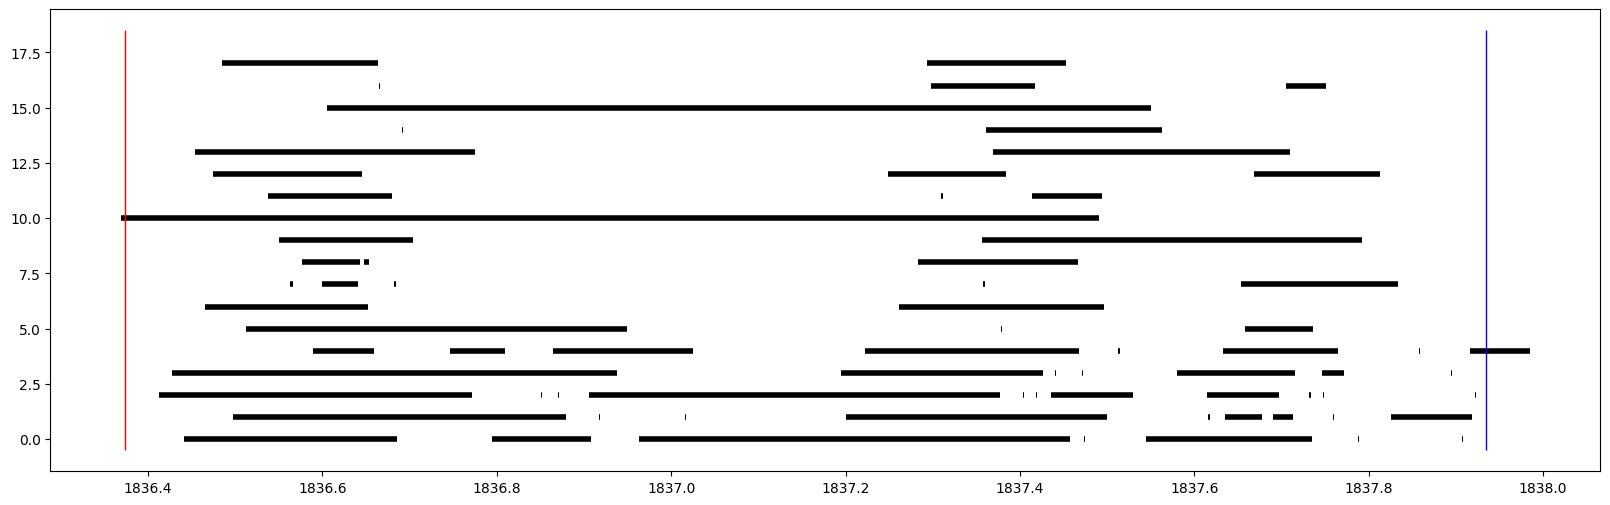

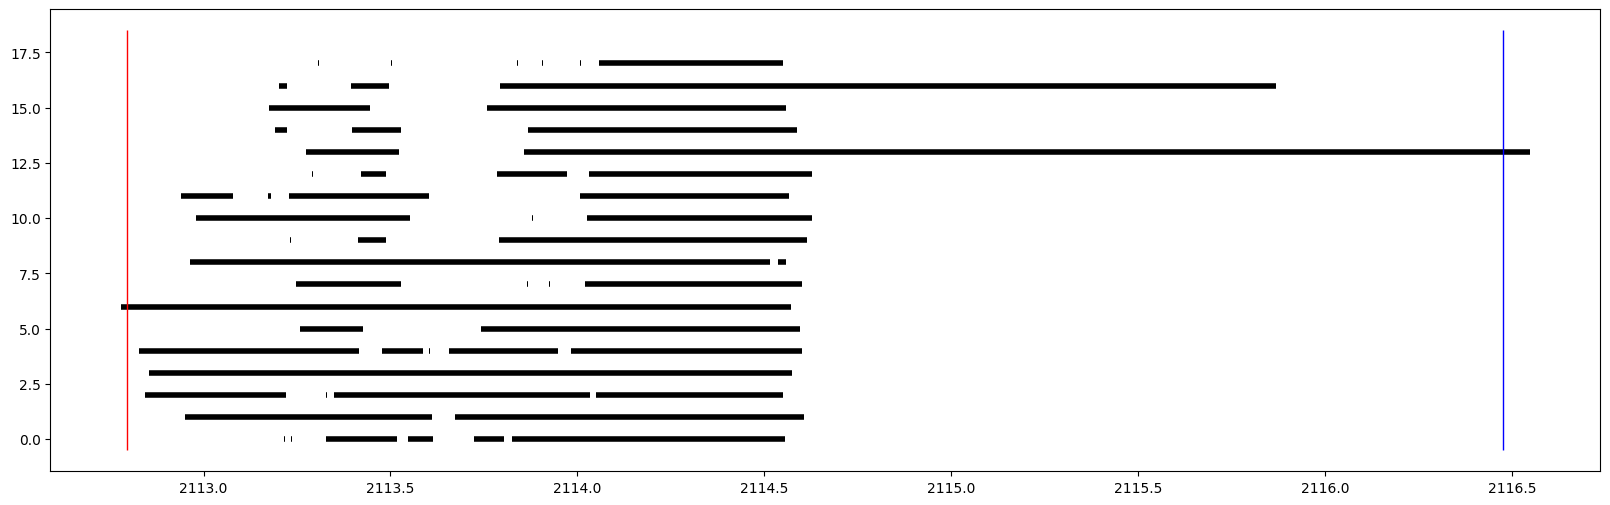

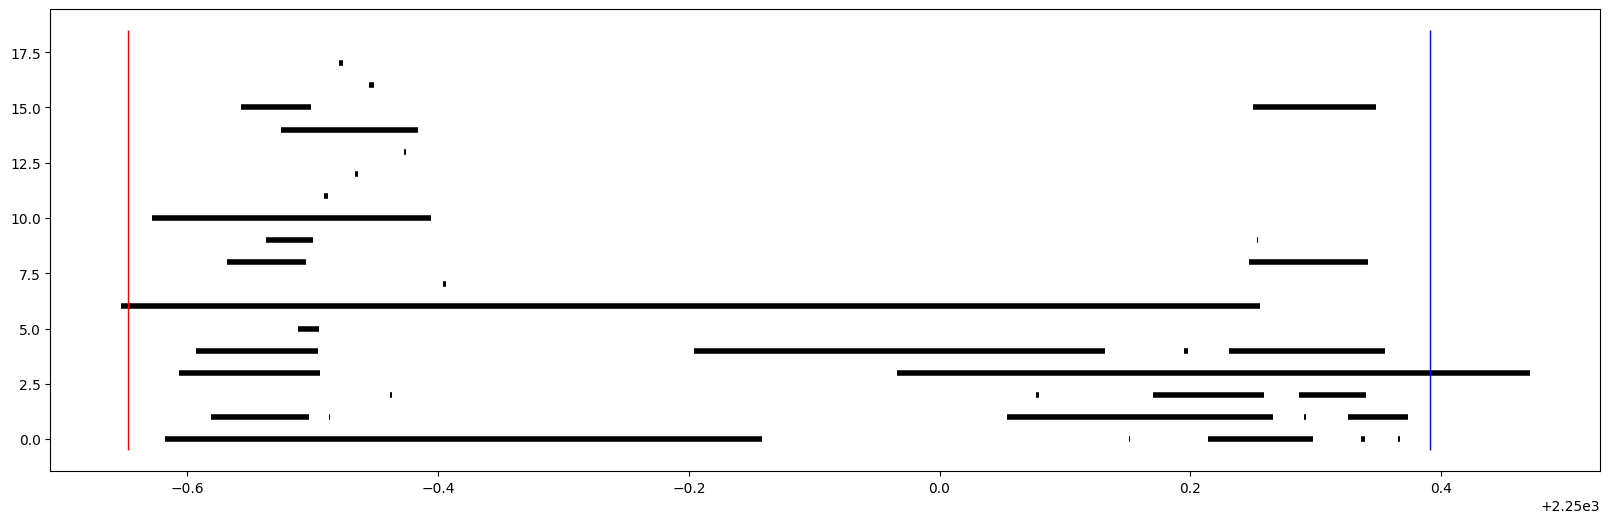

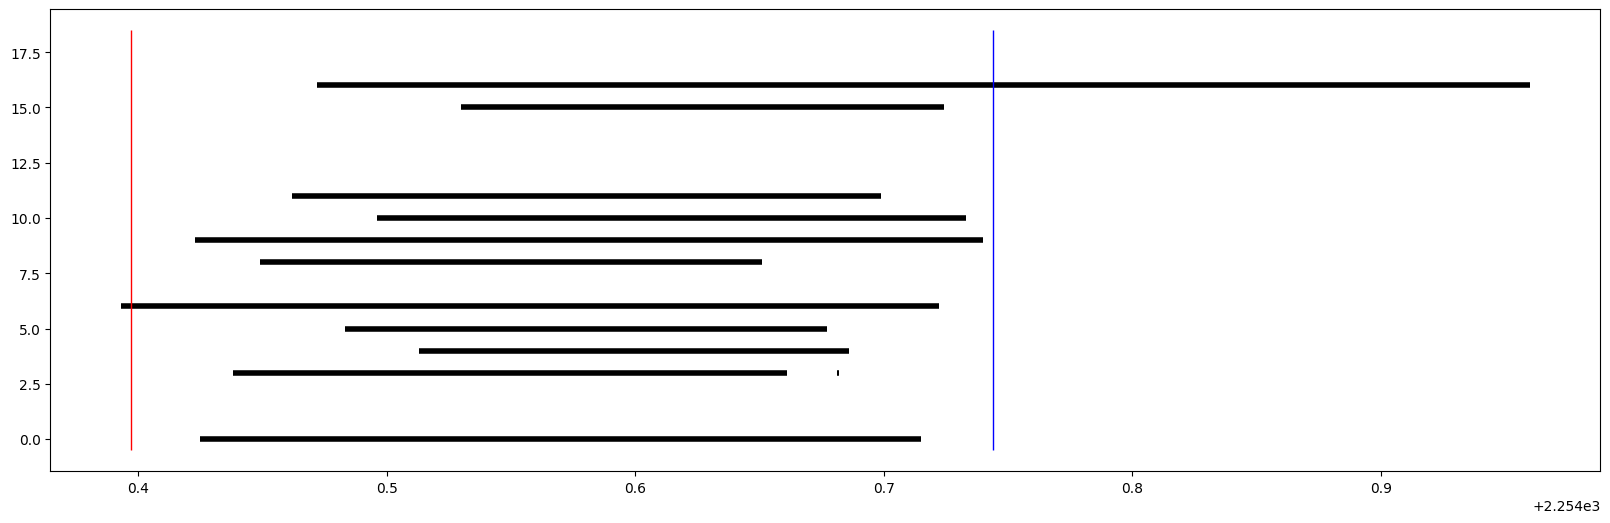

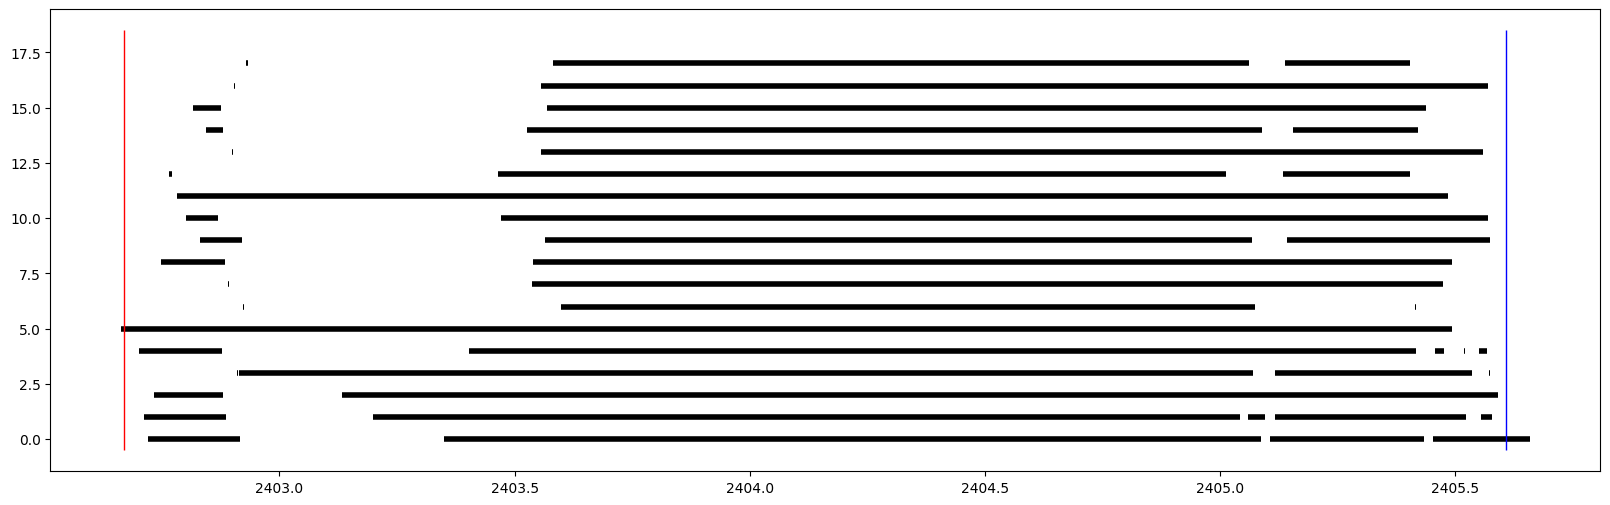

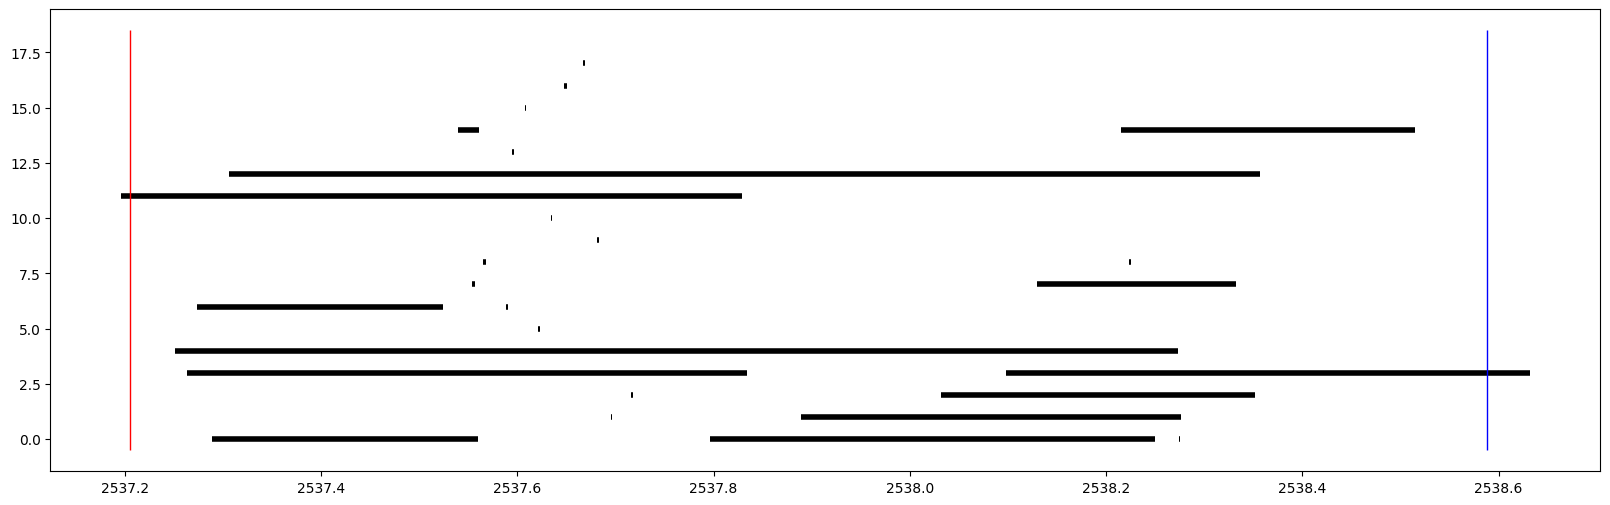

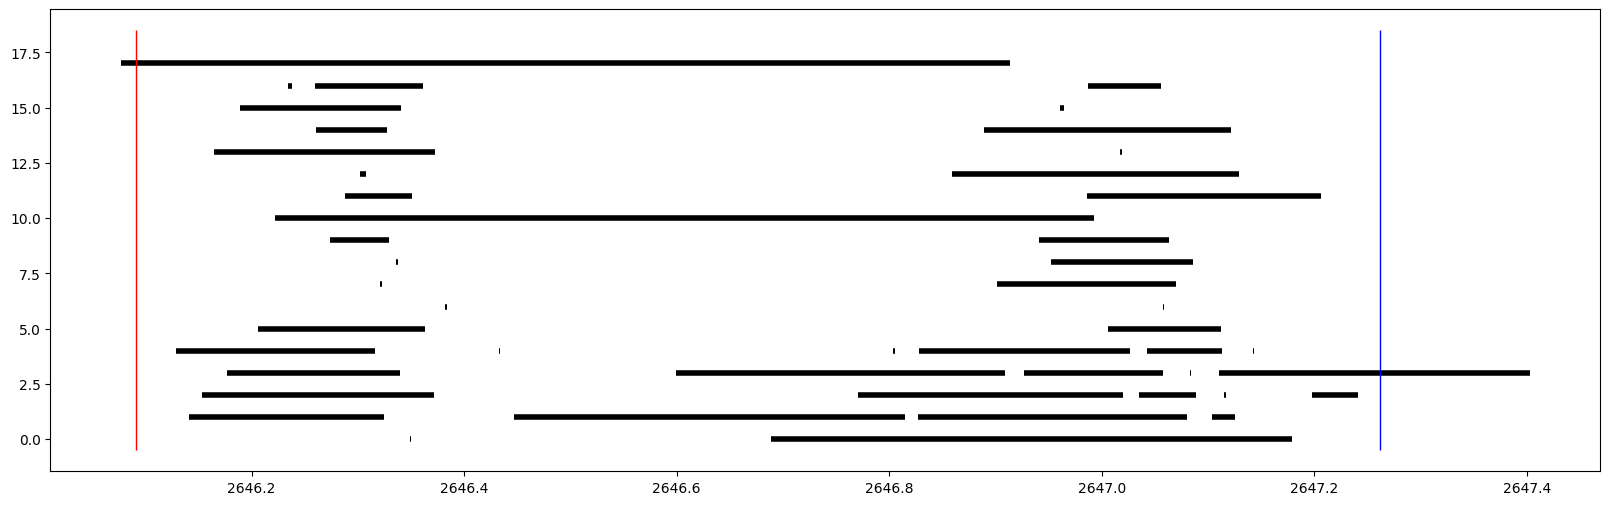

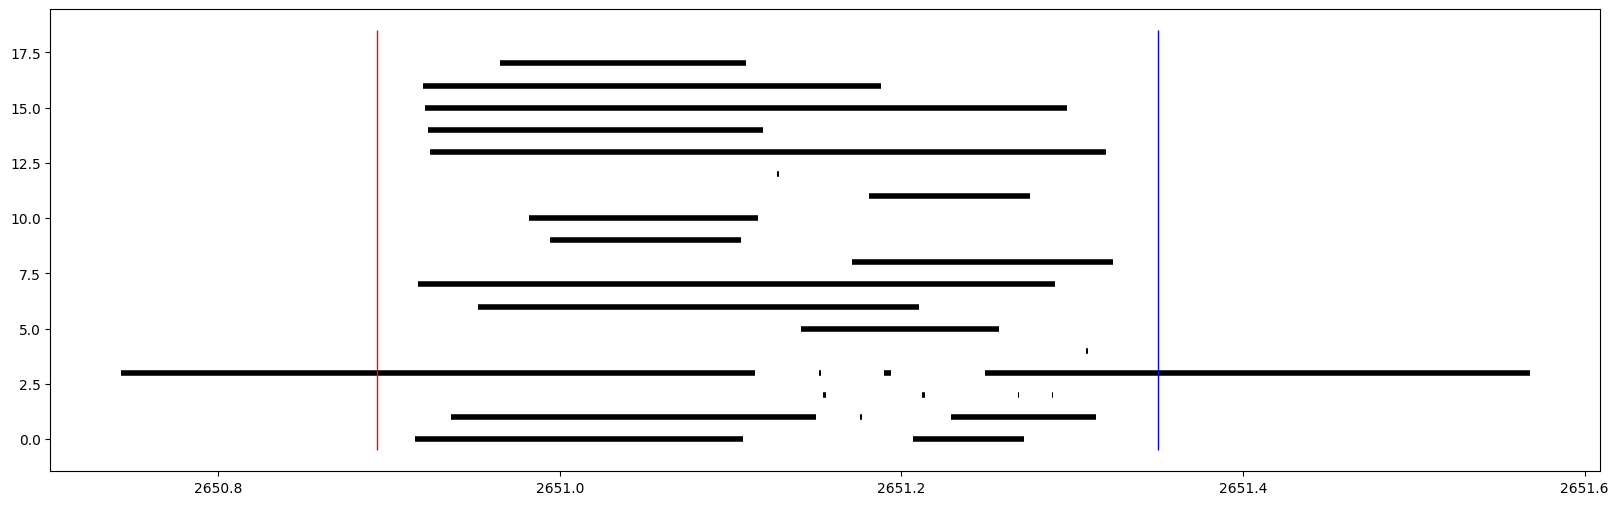

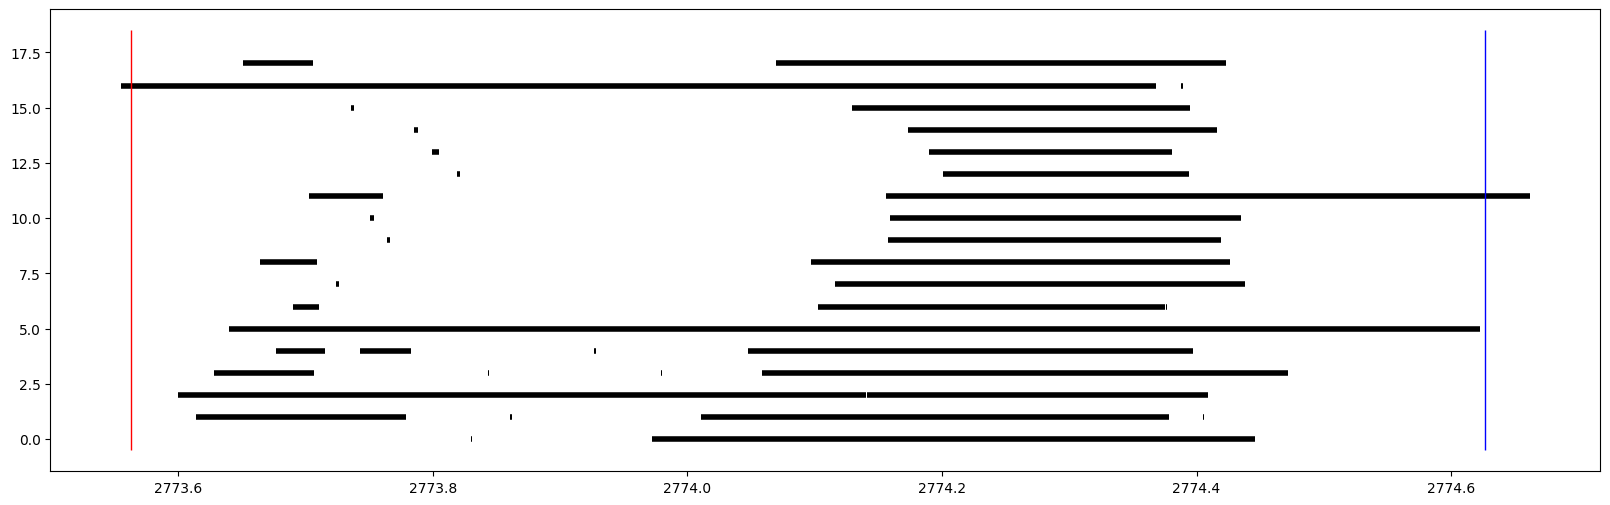

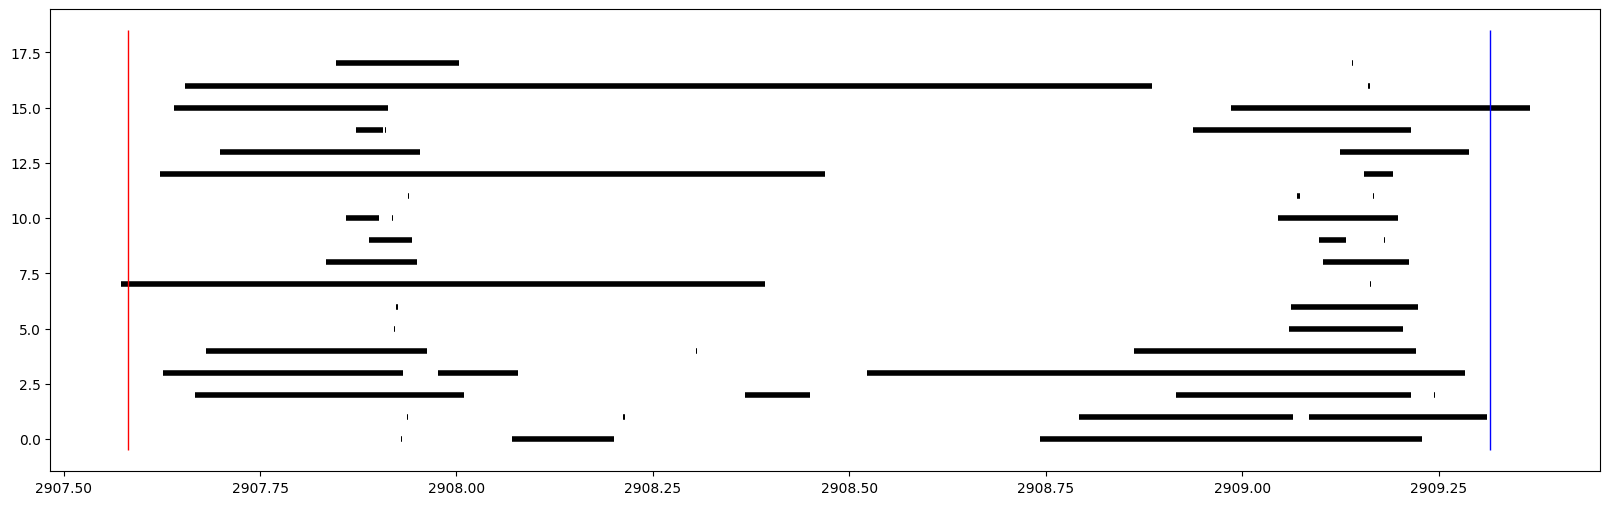

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [5]:
for i in range(60):
    plot_timeline("/home/wenyuz/MMTk-Dev/lxr-luindex.log", pauses=1, skip=i)